In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

#Import libs
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
%matplotlib inline

import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

print("Setup Complete")

Setup Complete


In [2]:
kaggle2020 = pd.read_csv('Data.csv')

In [8]:
# kaggle2020.head()

In [9]:
figtext_arg = dict(
            horizontalalignment='center',
            fontsize=12,
            wrap=True,
            alpha=0.65
)

In [10]:
def percent(row, total):
    row.Percent = (row.Count/total[row.Year])
    return row

In [11]:
ages = kaggle2020[['Age', 'Gender']]

#[Year, Gender]
agesPerYear = pd.concat([
    ages.Gender.value_counts()], 
    keys=['2020'], 
    names=["Year", "Gender"]
).reset_index(name="Count")

agesPerYear = agesPerYear.replace({'Male':'Man', 'Female':'Woman'})

agesPerYearSum = agesPerYear.groupby('Year').Count.sum()

agesPerYear['Percent'] = pd.Series(dtype='float64')
agesPerYear = agesPerYear.apply(percent, args=(agesPerYearSum,), axis=1)
agesPerYear = agesPerYear.sort_values(by=['Year','Percent'], ascending=[True, False])
agesPerYear.loc[(agesPerYear.Year == '2020')][['Gender','Count']].sort_values('Count')

,Gender,Count
4,Nonbinary,52
3,Prefer to self-describe,54
2,Prefer not to say,263
1,Woman,3878
0,Man,15789


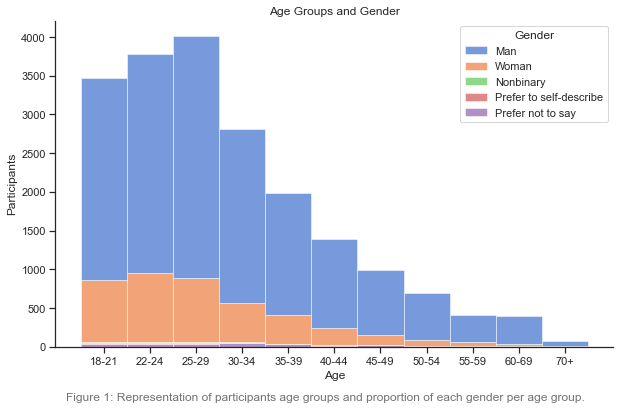

In [12]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10,6))
sns.despine(f)

ages = ages.sort_values(by=['Age','Gender'])
sns.histplot(
    ages,
    x="Age", hue="Gender", hue_order=['Man','Woman', 'Nonbinary','Prefer to self-describe', 'Prefer not to say'],
    multiple="stack",
    palette="muted",
    log_scale=False,
    linewidth= .5
)

plt.ylabel('Participants')

plt.title("Age Groups and Gender")

plt.figtext(0.5,0,
            "Figure 1: Representation of participants age groups and proportion of each gender per age group.",
            **figtext_arg
           )
plt.show()

## 프로그래밍 언어 사용

In [13]:
pd.set_option('display.max_row', 80)
pd.set_option('display.max_columns', 100)
# pd.Series(list(kaggle2020.columns))

In [14]:
col_list = list(kaggle2020.columns)

In [15]:
# col_list[12:25]

In [16]:
# kaggle2020[col_list[12]].value_counts()

In [17]:
language_val = []
for i in range(12,25):
    language_val.append(int(kaggle2020[col_list[i]].value_counts()))

language_val

[15530, 4277, 7535, 3315, 3827, 3367, 2995, 262, 198, 1776, 2217, 206, 1945]

In [18]:
# kaggle2020[col_list[22]].unique()

In [19]:
language = []
for i in range(12,25):
    language.append(kaggle2020[col_list[i]].unique()[0])

language[4] = 'C++'
language[5] = 'Java'
language[7] = 'Julia'
language[8] = 'Swift'
language[9] = 'Bash'
language[11] = 'None'

# language

In [20]:
values = language_val
columns = language

In [21]:
# python = list(kaggle2020['Q7_Part_1'].value_counts())

In [22]:
Lan_df = pd.DataFrame({"Language":language,
                  "Values":language_val})
# Lan_df

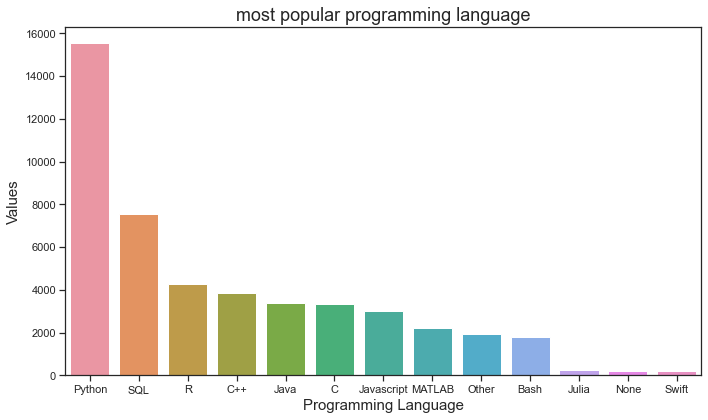

In [23]:
plt.figure(figsize=(10,6))
# make barplot
sns.barplot(x='Language', y="Values", data=Lan_df, order=Lan_df.sort_values('Values', ascending=False).Language)
# set labels
plt.xlabel("Programming Language", size=15)
plt.ylabel("Values", size=15)
plt.title("most popular programming language", size=18)
plt.tight_layout()
plt.savefig("barplot_Seaborn_Python.png", dpi=100)